# Use Pandas to  analyze CSV files of seismic rays 

## Explore the pandas functions, and validate testing the algorithms.

### Change the input csv file: P-waves first, then S-waves 

###  Fei Zhang
### Last updated 2019-06-14

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt

print(os.environ['PSTHOME'])

# input CSV and phases (P or S)
phase='P'
inputcsv = os.path.join(os.environ['PSTHOME'],'tests/testdata/100K_ensemble.p.txt')

#inputcsv = '/MySoft/Githubz/passive-seismic/tests/testdata/100K_ensemble.p.txt'


csv_data = pd.read_csv(inputcsv, sep='\s+', header='infer')

csv_data.head()

/g/data/ha3/fxz547/Githubz/passive-seismic/


#eventID  originTimestamp  mag   originLon  originLat  \
0  smi:local/102160r49     1.197052e+09  4.8  144.212962  -4.554822   
1  smi:local/102160r49     1.197052e+09  4.8  144.212962  -4.554822   
2  smi:local/102160r49     1.197052e+09  4.8  144.212962  -4.554822   
3  smi:local/102160r49     1.197052e+09  4.8  144.212962  -4.554822   
4  smi:local/102160r49     1.197052e+09  4.8  144.212962  -4.554822   

   originDepthKm net   sta  cha  pickTimestamp   ...            az  \
0           98.8  AU   KNA  BHZ   1.197052e+09   ...    232.647636   
1           98.8  IR   QLP  BHZ   1.197052e+09   ...    179.947115   
2           98.8  AU   RMQ  BHZ   1.197052e+09   ...    169.186187   
3           98.8  GE   WSI  BHZ   1.197052e+09   ...    256.588695   
4           98.8  GE  ARMA  BHZ   1.197052e+09   ...    165.616858   

          baz   distance  ttResidual  snr  qualityMeasureCWT  domFreq  \
0   55.399525  18.838486   -0.134955  0.0                0.0      0.0   
1  359.941088  21.923102    1.734943  0.0                0.0      0.0   
2  347.946731  22.255710    3.240389  0.0                0.0      0.0   
3   79.595928  24.286730   -0.985012  0.0                0.0      0.0   
4  343.327251  26.681831    2.491256  0.0                0.0      0.0   

   qualityMeasureSlope  bandIndex  nSigma  
0                  0.0          0       0  
1                  0.0          0       0  
2                  0.0          0       0  
3                  0.0          0       0  
4                  0.0          0       0  

[5 rows x 23 columns]

# How to setup install ellip-corr?

In [2]:
# See: https://github.com/GeoscienceAustralia/ellip-corr

# cd ellip-corr; 
# pip install --user .
# export PSTHOME=/MySoft/Githubz/passive-seismic

# export ELLIPCORR=$PSTHOME/ellip-corr/

In [54]:
# testing ellip-corr 
import os
print(os.environ['ELLIPCORR'])

import ellipcorr
print(ellipcorr.__file__)

ellipcorr.ellipticity_corr('sP', 65, 124, 45, 39)
# Out[2]: -0.38976147770881653

#ellipcorr.ellipticity_corr('P', 65, 124, 45, 39)
# Out[3]: -0.3774765431880951

ellipcorr.ellipticity_corr('pPKiKP', 65, 124, 45, 39)
# Out[4]: -0.7800000309944153

/g/data/ha3/fxz547/Githubz/passive-seismic//ellip-corr/
/g/data1a/ha3/fxz547/Githubz/passive-seismic/ellipcorr.cpython-36m-x86_64-linux-gnu.so


-0.7800000309944153

In [55]:
from seismic.traveltime.cluster_grid import Grid2
import seismic.traveltime.sort_rays as sortrays


column_name_map={
    "originLon": "source_lon",
    "originLat": "source_lat",
    "originDepthKm":"source_depth_km",
    "stationLon": "station_lon",
    "stationLat": "station_lat",
    "ttResidual":  "tt_residual"
}

# rename the columns
csv_data.rename(columns=column_name_map, inplace=True)

# apply filters

csv_data = sortrays.apply_filters(csv_data, phase)

The initial CSV size= (99999, 23)
After residual cutoff, CSV size= (91229, 24)
After qualityMeasureCWT, CSV size= (84442, 24)
After qualityMeasureSlope, CSV size= (82639, 24)
After nSigma, CSV size= (82551, 24)
The Number of Saved P Rays =  82551 ['AU_KNA_smi:local/102160r49', 'IR_QLP_smi:local/102160r49', 'AU_RMQ_smi:local/102160r49']


In [56]:
# the csv size after filters applied:
print(csv_data.shape)

csv_data.head()

(82551, 24)


#eventID  originTimestamp  mag  source_lon  source_lat  \
0  smi:local/102160r49     1.197052e+09  4.8  144.212962   -4.554822   
1  smi:local/102160r49     1.197052e+09  4.8  144.212962   -4.554822   
2  smi:local/102160r49     1.197052e+09  4.8  144.212962   -4.554822   
3  smi:local/102160r49     1.197052e+09  4.8  144.212962   -4.554822   
4  smi:local/102160r49     1.197052e+09  4.8  144.212962   -4.554822   

   source_depth_km net   sta  cha  pickTimestamp        ...          \
0             98.8  AU   KNA  BHZ   1.197052e+09        ...           
1             98.8  IR   QLP  BHZ   1.197052e+09        ...           
2             98.8  AU   RMQ  BHZ   1.197052e+09        ...           
3             98.8  GE   WSI  BHZ   1.197052e+09        ...           
4             98.8  GE  ARMA  BHZ   1.197052e+09        ...           

          baz   distance  tt_residual  snr  qualityMeasureCWT  domFreq  \
0   55.399525  18.838486    -0.134955  0.0                0.0      0.0   
1  359.941088  21.923102     1.734943  0.0                0.0      0.0   
2  347.946731  22.255710     3.240389  0.0                0.0      0.0   
3   79.595928  24.286730    -0.985012  0.0                0.0      0.0   
4  343.327251  26.681831     2.491256  0.0                0.0      0.0   

   qualityMeasureSlope  bandIndex  nSigma  manual_picks_flag  
0                  0.0          0       0                  1  
1                  0.0          0       0                  1  
2                  0.0          0       0                  1  
3                  0.0          0       0                  1  
4                  0.0          0       0                  1  

[5 rows x 24 columns]

In [57]:

p_events_df= pd.read_csv("P_EVENTS.csv", header='infer')

#p_events_df.head()


print("before drop_duplicates() p_events_df.shape =", p_events_df.shape)

p_events_df.drop_duplicates() #p_events_df.drop_duplicates() has no effect

print("After drop_duplicates() p_events_df.shape =", p_events_df.shape)


before drop_duplicates() p_events_df.shape = (82551, 3)
After drop_duplicates() p_events_df.shape = (82551, 3)


In [58]:
if phase == 'S':
    
    p_events_df = p_events_df.groupby(by=['#eventID', 'net', 'sta']).count().reset_index()

    print("After reset_index p_events_df.shape =", p_events_df.shape)


    merged_df = pd.merge(csv_data, p_events_df, 
                     how='inner',  # This matters a lot
                     on=['#eventID', 'net','sta'])
    
    print("The csv_data.shape before merge", csv_data.shape)
    
    print("The merged_df.shape  ", merged_df.shape)

# Map seismic events and stations onto a grid model, then cluster sort rays

In [59]:
mygrid = Grid2(param_file=os.path.join(os.environ['PSTHOME'],"seismic/traveltime/param1x1"))


In [60]:
import ellipcorr

from obspy.geodetics import gps2dist_azimuth, locations2degrees
import logging
from seismic.traveltime import pslog
from seismic.traveltime.cluster_grid import Grid2

# DPI = asin(1.0) / 90.0
# R2D = 90. / asin(1.)
# FLOAT_FORMAT = '%.4f'

log = logging.getLogger(__name__)
log.setLevel(logging.DEBUG)

def compute_ellipticity_corr(arrival_phase, ev_latitude, ev_longitude, ev_depth_km, sta_latitude, sta_longitude,
                             degrees_to_source):
    """
    Utility function to compute ellipticity correction.

    :param arrival_phase: P or S
    :param ev_latitude:  event lat
    :param ev_longitude: event long
    :param ev_depth_km: event depth in km
    :param sta_latitude: station lat
    :param sta_longitude: station long
    :param degrees_to_source: degree to source
    :return: ellipticity correction float value
    """
    myazim = gps2dist_azimuth(ev_latitude, ev_longitude, sta_latitude, sta_longitude)[1]  # [1] shall be taken
    # see https://docs.obspy.org/_modules/obspy/geodetics/base.html#gps2dist_azimuth
    # this function returns 3 values (Great_circle_distance_in_m, azimuth_A->B_in_degrees, azimuth_B->A_in degrees)

    log.debug("Check input params to ellipticity_corr = %s, %s, %s, %s, %s", arrival_phase, degrees_to_source,
              ev_depth_km, 90 - ev_latitude, myazim)

    ellipticity_corr = ellipcorr.ellipticity_corr(
        phase=arrival_phase,
        edist=degrees_to_source,
        edepth=ev_depth_km,
        ecolat=90 - ev_latitude,  # conversion to co-latitude
        azim=myazim
    )

    log.debug("ellipticity_corr = %s", ellipticity_corr)

    return ellipticity_corr


def sort_cluster(csv_data, phase, outputcsv):
    
    
    print("Initial csv_data size", csv_data.shape)
    
    csv_data['source_block'] = csv_data.apply(
        lambda x: mygrid.find_block_number(x.source_lat, x.source_lon, 1000 * (x.source_depth_km))[0], axis=1)

    csv_data['station_block'] = csv_data.apply(
        lambda x: mygrid.find_block_number(x.station_lat, x.station_lon, 0.0)[0], axis=1)

    csv_data['observed_tt'] = csv_data.pickTimestamp - csv_data.originTimestamp

    # cluster_data.to_csv(outputcsv+"_debug.CSV", header=True, index=False, sep=',')

    log.info('Begin Sorting arrivals.')

    # groupby automatically sorts
    med = csv_data.groupby(by=['source_block', 'station_block'])[
        'observed_tt'].quantile(q=.5, interpolation='lower').reset_index()
    
    print("The medium observed_tt rows:  ", med.shape)

    final_df = pd.merge(csv_data, med, how='right',
                        on=['source_block', 'station_block', 'observed_tt'],
                        sort=True, right_index=True)

    print("The merged csv_data and med size", final_df.shape)
    # use the following to keep only unique  prim_key: ['source_block', 'station_block']
    # final_df.drop_duplicates(subset=['source_block', 'station_block'],keep='first', inplace=True)
    # Note that some near-by stations may be cluster into one station_block_number, if want to keep stations try
    # final_df.drop_duplicates(subset=['source_block', 'station_block', 'station_code'],keep='first', inplace=True)

    final_df.drop_duplicates(subset=['source_block', 'station_block'], keep='first', inplace=True)
    
    print("the size of the final_df after drop_duplicates on source_block, station_block", final_df.shape)

    # elliptic correction to the  observed_travel_time;

    final_df['locations_to_degrees'] = final_df.apply(lambda x: locations2degrees(x.source_lat, x.source_lon,
                                                                                  x.station_lat, x.station_lon), axis=1)
    final_df['my_azim'] = final_df.apply(lambda x: gps2dist_azimuth(x.source_lat, x.source_lon,
                                                                    x.station_lat, x.station_lon)[1], axis=1)

    final_df['my_bazim'] = final_df.apply(lambda x: gps2dist_azimuth(x.source_lat, x.source_lon,
                                                                     x.station_lat, x.station_lon)[2], axis=1)
    final_df['ellipticity_corr'] = final_df.apply(lambda x:
                                                  compute_ellipticity_corr(phase, x.source_lat, x.source_lon,
                                                                           x.source_depth_km,
                                                                           x.station_lat, x.station_lon, x.distance),
                                                  axis=1)

    final_df['observed_tt'] = final_df.observed_tt + final_df.ellipticity_corr

    # make sure the originDepth/source_depth is in KM for required by inversion program

    final_df.to_csv(outputcsv, header=True, index=False, sep=',')  # use comma separator,

    # inpdf.to_csv(outputcsv, header=True, index=False, sep=' ')   # mismatch columns in space-delimited csv file as the NaN => empty space !

    # prepare for inversion-program input
    
    if phase == 'P':
        final_df['P_or_S'] = 1
    elif phase == 'S':
        final_df['P_or_S'] = 2
    else:
        raise Exception("Phase must be P or S !!!")

    final_df['event_number'] = final_df.apply(lambda x: int(x.originTimestamp), axis=1)

    # the following values are required for inversion program. the event_number defined as int(originTimestamp)
    # the columns must be in the order:
    required_columns = ['source_block', 'station_block', 'tt_residual', 'event_number',
                        'source_lon', 'source_lat', 'source_depth_km',
                        'station_lon', 'station_lat', 'observed_tt', 'locations_to_degrees', 'P_or_S']

    pdf4inv = final_df[required_columns]

    inv_txt = "%s_inv.txt" % outputcsv
    pdf4inv.to_csv(inv_txt, header=False, index=False, sep=' ', float_format='%.6f')  # space delimitted txt file

    print("Output CSV files = ",outputcsv, inv_txt)
    
    return (final_df, pdf4inv)

In [61]:
pdf1, pdf4 = sort_cluster(csv_data, phase, "%s_sort_cluster.csv"%phase)

Initial csv_data size (82551, 24)
The medium observed_tt rows:   (36393, 3)
The merged csv_data and med size (44252, 27)
the size of the final_df after drop_duplicates on source_block, station_block (36393, 27)
Output CSV files =  P_sort_cluster.csv P_sort_cluster.csv_inv.txt


In [62]:
pdf1.head(1)

#eventID  originTimestamp  mag  source_lon  source_lat  \
63889  smi:local/193401r68     1.283532e+09  7.3  171.984919   -43.37618   

       source_depth_km net  sta  cha  pickTimestamp      ...       \
63889         2.098619  II  TAU  BHZ   1.283532e+09      ...        

      manual_picks_flag  source_block  station_block  observed_tt  \
63889                 0         17085          17216    252.51243   

       locations_to_degrees     my_azim   my_bazim  ellipticity_corr  P_or_S  \
63889             17.937228  262.955847  99.962177          -0.14757       1   

       event_number  
63889    1283531746  

[1 rows x 33 columns]

In [63]:
pdf4.head(2)

source_block  station_block  tt_residual  event_number  source_lon  \
63889         17085          17216     0.949630    1283531746  171.984919   
63619         17085          19192    -1.956863    1283531746  171.984919   

       source_lat  source_depth_km  station_lon  station_lat  observed_tt  \
63889   -43.37618         2.098619     147.3200     -42.9089   252.512430   
63619   -43.37618         2.098619     145.4906     -37.5714   281.680508   

       locations_to_degrees  P_or_S  
63889             17.937228       1  
63619             20.873575       1

In [64]:
print(pdf1.shape, pdf4.shape)

(36393, 33) (36393, 12)


# Do the clustering and sorting of pdf1 again, should converge to the same CSV.

In [65]:
# apply the same function

pdf1_A, pdf4_A = sort_cluster(pdf1, phase, "%s_sort_cluster_A.csv"%phase)

Initial csv_data size (36393, 33)
The medium observed_tt rows:   (36393, 3)
The merged csv_data and med size (36393, 33)
the size of the final_df after drop_duplicates on source_block, station_block (36393, 33)
Output CSV files =  P_sort_cluster_A.csv P_sort_cluster_A.csv_inv.txt


In [66]:
print(pdf1_A.shape, pdf4_A.shape)

(36393, 33) (36393, 12)


In [67]:
pdf1_A.head(1)

#eventID  originTimestamp  mag  source_lon  source_lat  \
63889  smi:local/193401r68     1.283532e+09  7.3  171.984919   -43.37618   

       source_depth_km net  sta  cha  pickTimestamp      ...       \
63889         2.098619  II  TAU  BHZ   1.283532e+09      ...        

      manual_picks_flag  source_block  station_block  observed_tt  \
63889                 0         17085          17216    252.51243   

       locations_to_degrees     my_azim   my_bazim  ellipticity_corr  P_or_S  \
63889             17.937228  262.955847  99.962177          -0.14757       1   

       event_number  
63889    1283531746  

[1 rows x 33 columns]

In [68]:
# how to compare the vaules of two pdf dataframes pdf1 and pdf1_A??

pdf1['#eventID'].isin(pdf1_A['#eventID']).value_counts()

True    36393
Name: #eventID, dtype: int64

In [69]:
pdf1_A['#eventID'].isin(pdf1['#eventID']).value_counts()

True    36393
Name: #eventID, dtype: int64

# Analyse the Algorithm

In [70]:

csv_data.shape

(82551, 27)

In [71]:
med = csv_data.groupby(by=['source_block', 'station_block'])[
        'observed_tt'].quantile(q=.5, interpolation='lower').reset_index()
    
print("The med shape:  ", med.shape)


The med shape:   (36393, 3)


In [72]:
med.head()

source_block  station_block  observed_tt
0         17085          17216       252.66
1         17085          19192       281.80
2         17085          19379       255.26
3         17085          19919       263.76
4         17085          19920       263.38

In [73]:
csv_data.loc[csv_data.source_block==17085][['source_block', 'station_block', 'observed_tt']].sort_values(by='station_block')

source_block  station_block  observed_tt
63889         17085          17216       252.66
63619         17085          19192       281.80
63612         17085          19379       255.26
63614         17085          19919       263.76
63615         17085          19919       263.79
63613         17085          19920       263.38
63657         17085          20029       496.06
63616         17085          20278       276.51
63653         17085          20755       485.18
63652         17085          20755       485.16
63625         17085          21164       339.13
63623         17085          21164       337.06
63624         17085          21164       337.01
63617         17085          21724       280.98
63618         17085          21724       280.98
63610         17085          22145       231.36
63611         17085          22145       231.40
63622         17085          23523       323.12
63831         17085          24209       426.41
63883         17085          24209       426.76
63835         17085          24209       426.36
63844         17085          24209       426.51
63824         17085          24209       426.26
63822         17085          24209       426.76
63637         17085          24209       427.28
63638         17085          24209       427.28
63620         17085          24814       289.75
63621         17085          24814       294.32
63662         17085          25080       523.60
63826         17085          25300       414.51
...             ...            ...          ...
63749         17085        7802402       771.06
63755         17085        7802546       777.46
63733         17085        7802554       737.71
63732         17085        7802554       741.34
63782         17085        7802686       809.06
63776         17085        7802689       799.96
63758         17085        7802837       777.06
63759         17085        7802837       777.06
63760         17085        7802837       777.01
63757         17085        7802837       777.01
63754         17085        7802837       776.46
63745         17085        7802841       760.35
63787         17085        7802976       811.66
63788         17085        7802976       811.65
63777         17085        7802979       798.46
63779         17085        7803123       803.16
63772         17085        7803126       795.36
63774         17085        7803127       793.46
63753         17085        7803131       777.35
63783         17085        7803268       810.96
63780         17085        7803270       806.78
63778         17085        7803271       797.88
63766         17085        7803275       784.87
63761         17085        7803276       780.66
63765         17085        7803277       784.16
63775         17085        7803419       795.06
63790         17085        7803559       819.56
63785         17085        7803713       813.60
63784         17085        7803713       812.86
63786         17085        7803713       809.71

[192 rows x 3 columns]

In [74]:
# Check the merged final_pdf
print("csv_data.shape", csv_data.shape)
final_df = pd.merge(csv_data, med, how='right',
                    on=['source_block', 'station_block', 'observed_tt'],
                    sort=True, right_index=True)

print("The final_df (merged csv_data and med) size =", final_df.shape)

csv_data.shape (82551, 27)
The final_df (merged csv_data and med) size = (44252, 27)


In [75]:
 
src_bn=17085; sta_bn=17216 # only 1

src_bn=17085; sta_bn=24209 # 8 rays in cluster

src_bn=17085; sta_bn=7803713 # 3 rows

src_bn=17085; sta_bn=7802837  # 5 rows

csv_data.loc[(csv_data.source_block==src_bn) & (csv_data.station_block==sta_bn), ['source_block', 'station_block', 'observed_tt']].sort_values(by='observed_tt')

source_block  station_block  observed_tt
63754         17085        7802837       776.46
63757         17085        7802837       777.01
63760         17085        7802837       777.01
63758         17085        7802837       777.06
63759         17085        7802837       777.06

In [76]:
# compare with the selection result in med dataframe

med.loc[(med.source_block==src_bn) & (med.station_block==sta_bn) ]

source_block  station_block  observed_tt
114         17085        7802837       777.01

In [77]:
# The final_df has many duplicate rows in keys ['source_block', 'station_block', 'observed_tt'] due to duplications in catalogues

# for example, at src_bn=17085; sta_bn=7802837  # 5 rows

# 	source_block 	station_block 	observed_tt
# 63757 	17085 	7802837 	777.01
# 63760 	17085 	7802837 	777.01

In [78]:

final_df.loc[(final_df.source_block==src_bn) & (final_df.station_block==sta_bn), ['source_block', 'station_block', 'observed_tt']].sort_values(by='observed_tt')

source_block  station_block  observed_tt
63757         17085        7802837       777.01
63760         17085        7802837       777.01

In [79]:
# now let's drop the duplicates:

final_df.drop_duplicates(subset=['source_block', 'station_block'], keep='first', inplace=True)

In [80]:
# only one will be left 
final_df.loc[(final_df.source_block==src_bn) & (final_df.station_block==sta_bn), ['source_block', 'station_block', 'observed_tt']].sort_values(by='observed_tt')

source_block  station_block  observed_tt
63757         17085        7802837       777.01

In [81]:
final_df.shape

(36393, 27)

<Figure size 432x288 with 0 Axes>

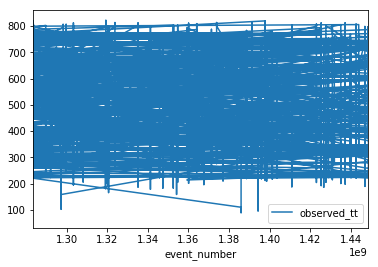

In [82]:
plt.figure(); pdf1.plot(x='event_number', y='observed_tt')
# plt.figure(); pdf2.plot(x='event_number', y='source_depth')
# plt.figure(); pdf2.plot(x='event_number', y='locations2degrees')
# plt.figure(); pdf2.plot(x='event_number', y='residual')  # less than +-10s



<Figure size 432x288 with 0 Axes>

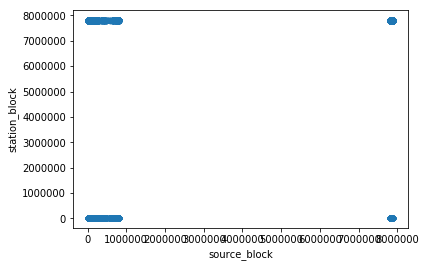

In [83]:
plt.figure(); pdf1.plot.scatter(x='source_block', y='station_block')

<Figure size 432x288 with 0 Axes>

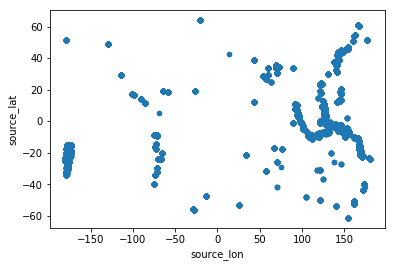

In [84]:
plt.figure(); pdf1.plot.scatter(x='source_lon', y='source_lat')

<Figure size 432x288 with 0 Axes>

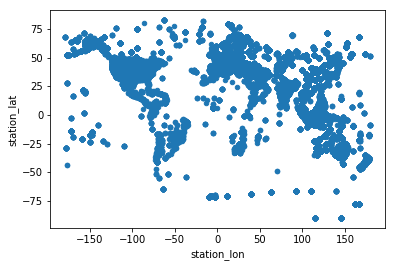

In [85]:
plt.figure(); pdf1.plot.scatter(x='station_lon', y='station_lat')

In [86]:
 med = pdf1.groupby(by=['source_block', 'station_block'])[
        'observed_tt'].quantile(q=.5, interpolation='lower').reset_index()

In [87]:
med.head()

source_block  station_block  observed_tt
0         17085          17216       252.66
1         17085          19192       281.80
2         17085          19379       255.26
3         17085          19919       263.76
4         17085          19920       263.38

In [88]:
med.shape

(36393, 3)

In [89]:
pdf1.shape

(36393, 33)

In [90]:
pdf3=csv_data.groupby(by=['source_block', 'station_block']).count()

In [91]:
pdf3.shape

(36393, 25)

In [92]:
pdf3.head()

#eventID  originTimestamp  mag  source_lon  \
source_block station_block                                               
17085        17216                 1                1    1           1   
             19192                 1                1    1           1   
             19379                 1                1    1           1   
             19919                 2                2    2           2   
             19920                 1                1    1           1   

                            source_lat  source_depth_km  net  sta  cha  \
source_block station_block                                               
17085        17216                   1                1    1    1    1   
             19192                   1                1    1    1    1   
             19379                   1                1    1    1    1   
             19919                   2                2    2    2    2   
             19920                   1                1    1    1    1   

                            pickTimestamp     ...       distance  tt_residual  \
source_block station_block                    ...                               
17085        17216                      1     ...              1            1   
             19192                      1     ...              1            1   
             19379                      1     ...              1            1   
             19919                      2     ...              2            2   
             19920                      1     ...              1            1   

                            snr  qualityMeasureCWT  domFreq  \
source_block station_block                                    
17085        17216            1                  1        1   
             19192            1                  1        1   
             19379            1                  1        1   
             19919            2                  2        2   
             19920            1                  1        1   

                            qualityMeasureSlope  bandIndex  nSigma  \
source_block station_block                                           
17085        17216                            1          1       1   
             19192                            1          1       1   
             19379                            1          1       1   
             19919                            2          2       2   
             19920                            1          1       1   

                            manual_picks_flag  observed_tt  
source_block station_block                                  
17085        17216                          1            1  
             19192                          1            1  
             19379                          1            1  
             19919                          2            2  
             19920                          1            1  

[5 rows x 25 columns]

In [93]:
pdf4=pdf3[(pdf3['tt_residual']>=2)]  # more than one ray in the source->station set of rays

In [94]:
pdf4.shape

(14570, 25)

In [95]:
pdf4.tail()

#eventID  originTimestamp  mag  source_lon  \
source_block station_block                                               
7874268      7804693               2                2    2           2   
             7804793               2                2    2           2   
             7805052               2                2    2           2   
             7805097               2                2    2           2   
             7805239               2                2    2           2   

                            source_lat  source_depth_km  net  sta  cha  \
source_block station_block                                               
7874268      7804693                 2                2    2    2    2   
             7804793                 2                2    2    2    2   
             7805052                 2                2    2    2    2   
             7805097                 2                2    2    2    2   
             7805239                 2                2    2    2    2   

                            pickTimestamp     ...       distance  tt_residual  \
source_block station_block                    ...                               
7874268      7804693                    2     ...              2            2   
             7804793                    2     ...              2            2   
             7805052                    2     ...              2            2   
             7805097                    2     ...              2            2   
             7805239                    2     ...              2            2   

                            snr  qualityMeasureCWT  domFreq  \
source_block station_block                                    
7874268      7804693          2                  2        2   
             7804793          2                  2        2   
             7805052          2                  2        2   
             7805097          2                  2        2   
             7805239          2                  2        2   

                            qualityMeasureSlope  bandIndex  nSigma  \
source_block station_block                                           
7874268      7804693                          2          2       2   
             7804793                          2          2       2   
             7805052                          2          2       2   
             7805097                          2          2       2   
             7805239                          2          2       2   

                            manual_picks_flag  observed_tt  
source_block station_block                                  
7874268      7804693                        2            2  
             7804793                        2            2  
             7805052                        2            2  
             7805097                        2            2  
             7805239                        2            2  

[5 rows x 25 columns]

In [96]:
# select rows
rowmask= (pdf1['source_block'] == 7875846) & (pdf1['station_block']==7803235)  #select certain rows
pdf5=pdf1.loc[ rowmask ]

In [97]:
pdf5.head()

Empty DataFrame
Columns: [#eventID, originTimestamp, mag, source_lon, source_lat, source_depth_km, net, sta, cha, pickTimestamp, phase, station_lon, station_lat, az, baz, distance, tt_residual, snr, qualityMeasureCWT, domFreq, qualityMeasureSlope, bandIndex, nSigma, manual_picks_flag, source_block, station_block, observed_tt, locations_to_degrees, my_azim, my_bazim, ellipticity_corr, P_or_S, event_number]
Index: []

[0 rows x 33 columns]

In [98]:
# iloc[] select by row and column numbers as in the CSV table
# loc[] select by index OR by boolean or conditional lookup

# .iloc returns a Pandas Series when one row is selected,
# and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected. 
# To counter this, pass a single-valued list if you require DataFrame output.
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

pdf4_A.iloc[0]


source_block            1.708500e+04
station_block           1.721600e+04
tt_residual             9.496300e-01
event_number            1.283532e+09
source_lon              1.719849e+02
source_lat             -4.337618e+01
source_depth_km         2.098619e+00
station_lon             1.473200e+02
station_lat            -4.290890e+01
observed_tt             2.525124e+02
locations_to_degrees    1.793723e+01
P_or_S                  1.000000e+00
Name: 63889, dtype: float64

In [99]:
pdf4_A.iloc[[0]]

source_block  station_block  tt_residual  event_number  source_lon  \
63889         17085          17216      0.94963    1283531746  171.984919   

       source_lat  source_depth_km  station_lon  station_lat  observed_tt  \
63889   -43.37618         2.098619       147.32     -42.9089    252.51243   

       locations_to_degrees  P_or_S  
63889             17.937228       1

In [100]:
rowmask= (pdf4_A['source_block'] == 7875846) & (pdf4_A['station_block']==7803235)  #select certain rows
pdf5=pdf4_A.loc[ rowmask ]

In [101]:
pdf5.head()

Empty DataFrame
Columns: [source_block, station_block, tt_residual, event_number, source_lon, source_lat, source_depth_km, station_lon, station_lat, observed_tt, locations_to_degrees, P_or_S]
Index: []

In [102]:
#################################

stop here

SyntaxError: invalid syntax (<ipython-input-102-0bdb1988fcad>, line 3)

In [ ]:
import random

def generate_random_point(left, right, bottom, top):
    x=random.randrange(left,right)
    y=random.randrange(bottom,top)
    return (x,y)

############################################### test run
left=-1087626
right=1669944
bottom= -2842701
top= -958506

for ipoint in range(0,10):
    lonlat = generate_random_point(left, right, bottom, top)
    print("Random Point (lot, lat) =:", lonlat)

In [ ]:
-170%360